In [17]:
# plots for time, number of sequences, and purity for each window size

In [169]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

In [170]:
# Ex: time_str = "0m8.427s"
def stringTime_sec(time_str):
    datetime_object = datetime.strptime(time_str, '%Mm%S.%fs')
    minutes = datetime_object.minute
    seconds = datetime_object.second + datetime_object.microsecond / 1000000
    total = minutes*60 + seconds
    return round(total, 3)

# testing
print(stringTime_sec("1m8.427s"))
print(stringTime_sec("0m8.427s"))
# x
#tmp_nums = re.findall("\d+\.\d+", x)
#tmp_nums

68.427
8.427


In [171]:
infor = {}
window_size = None
res_file = "data/for_pair_iou_test2/sequence_stat_243_v2"

f = open(res_file, "r")
for x in f:
    if "window size" in x: 
        # print(x[:-1])
        tmp_nums = int(re.findall("\d+", x)[0])
        print("window size: {}".format(tmp_nums))
        window_size = tmp_nums
        
    if "real" in x: 
        # print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size] = {"real":total_sec}
        
    if "user" in x: 
        #print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size]["user"] = total_sec
        
    if "sys" in x: 
        #print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size]["sys"] = total_sec
        
    if "sequences" in x: 
        # print(x[:-1])
        tmp_nums = int(re.findall("\d+", x)[0])
        print("sequences: {}".format(tmp_nums))
        infor[window_size]["sequences"] = tmp_nums
        
    if "purity" in x:
        # print(x[:-1])
        tmp_nums = float(re.findall("\d+\.\d+", x)[0])
        print("avg purity: {}\n".format(tmp_nums))
        infor[window_size]["purity"] = tmp_nums
    
    # print()
f.close()

window size: 2
real: 7.548s
real: 3.9s
real: 7.948s
sequences: 273
avg purity: 82.322715267447

window size: 3
real: 8.422s
real: 4.644s
real: 7.995s
sequences: 133
avg purity: 77.9156534527707

window size: 4
real: 9.188s
real: 5.419s
real: 8.028s
sequences: 98
avg purity: 74.84287221810918

window size: 5
real: 10.004s
real: 6.301s
real: 8.115s
sequences: 77
avg purity: 73.75991634001348

window size: 6
real: 10.677s
real: 7.275s
real: 7.834s
sequences: 67
avg purity: 72.04607065525272

window size: 7
real: 12.04s
real: 8.159s
real: 8.027s
sequences: 60
avg purity: 71.0131932842269

window size: 8
real: 13.023s
real: 9.291s
real: 7.987s
sequences: 56
avg purity: 69.42645523564387

window size: 9
real: 14.218s
real: 10.52s
real: 8.15s
sequences: 53
avg purity: 66.99793120958873

window size: 10
real: 15.418s
real: 11.797s
real: 8.098s
sequences: 47
avg purity: 66.1000024247296



In [172]:
infor

{2: {'real': 7.548,
  'user': 3.9,
  'sys': 7.948,
  'sequences': 273,
  'purity': 82.322715267447},
 3: {'real': 8.422,
  'user': 4.644,
  'sys': 7.995,
  'sequences': 133,
  'purity': 77.9156534527707},
 4: {'real': 9.188,
  'user': 5.419,
  'sys': 8.028,
  'sequences': 98,
  'purity': 74.84287221810918},
 5: {'real': 10.004,
  'user': 6.301,
  'sys': 8.115,
  'sequences': 77,
  'purity': 73.75991634001348},
 6: {'real': 10.677,
  'user': 7.275,
  'sys': 7.834,
  'sequences': 67,
  'purity': 72.04607065525272},
 7: {'real': 12.04,
  'user': 8.159,
  'sys': 8.027,
  'sequences': 60,
  'purity': 71.0131932842269},
 8: {'real': 13.023,
  'user': 9.291,
  'sys': 7.987,
  'sequences': 56,
  'purity': 69.42645523564387},
 9: {'real': 14.218,
  'user': 10.52,
  'sys': 8.15,
  'sequences': 53,
  'purity': 66.99793120958873},
 10: {'real': 15.418,
  'user': 11.797,
  'sys': 8.098,
  'sequences': 47,
  'purity': 66.1000024247296}}

In [173]:
x = list(infor.keys())

reals = [v['real'] for k, v in infor.items()]
users = [v['user'] for k, v in infor.items()]
sys = [v['sys'] for k, v in infor.items()]
usersAndsys = [v['user']+v['sys'] for k, v in infor.items()]

sequences = [v['sequences'] for k, v in infor.items()]
purity = [v['purity'] for k, v in infor.items()]

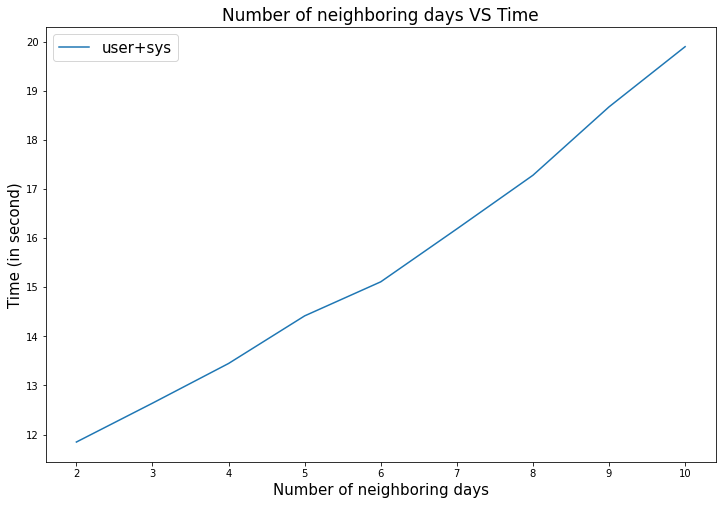

In [174]:
# Window VS time

plt.figure(figsize=(12, 8))
plt.title("Number of neighboring days VS Time", size=17)
#plt.plot(x, reals, label="real")
#plt.plot(x, users, label="user")
#plt.plot(x, sys, label="sys")
plt.plot(x, usersAndsys, label="user+sys")
plt.xlabel("Number of neighboring days", size=15)
plt.ylabel("Time (in second)", size=15)
plt.legend(prop={'size': 15})
plt.savefig('window_time.png')
plt.show()


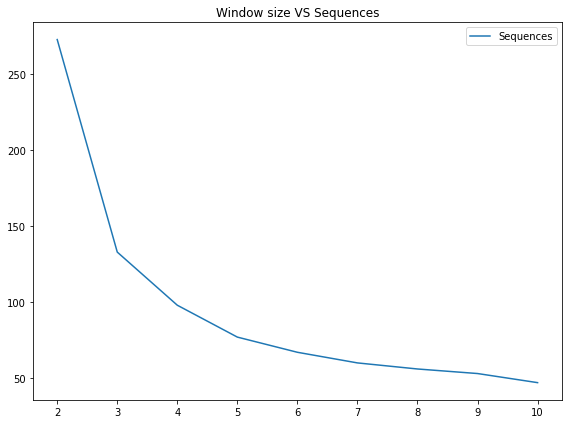

In [175]:
# Window size VS Sequences

plt.figure(figsize=(8, 6))
plt.title("Window size VS Sequences")
plt.plot(x, sequences, label="Sequences")
plt.legend()
plt.tight_layout()
plt.show()

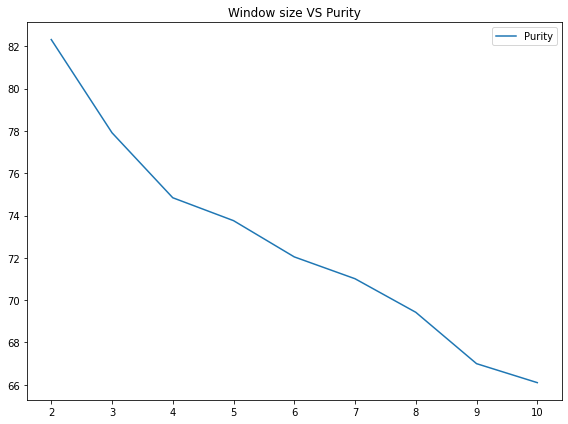

In [176]:
# Window size VS Purity

plt.figure(figsize=(8, 6))
plt.title("Window size VS Purity")
plt.plot(x, purity, label="Purity")
plt.legend()
plt.tight_layout()
plt.show()

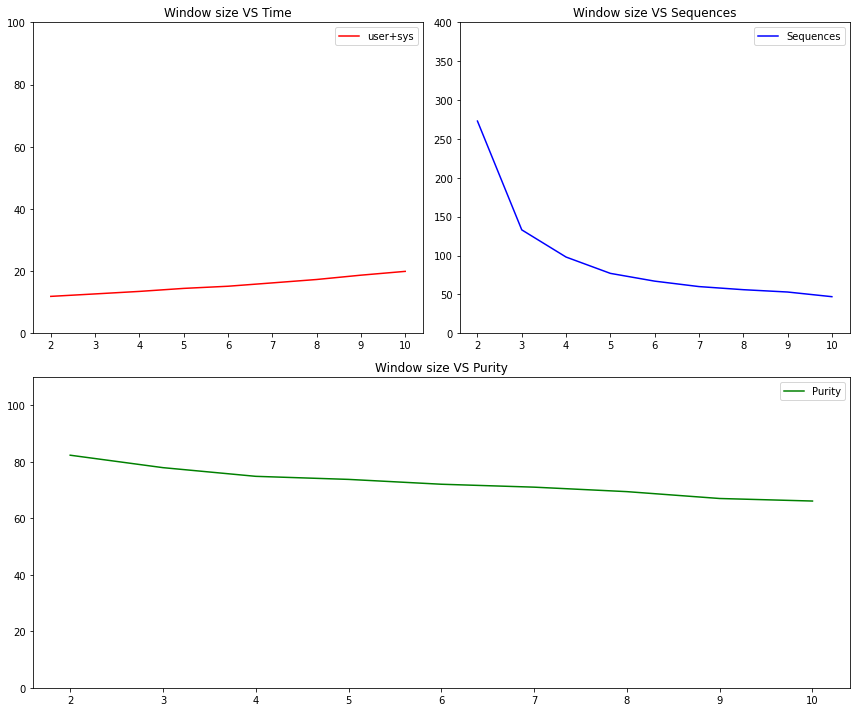

In [179]:
# subplots (All plots on one)

import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

# plt.figure()
ax = plt.subplots(figsize=(12,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.set_ylim(0, 100)
plt.title("Window size VS Time")
# plt.plot(x, reals, label="real")
#plt.plot(x, users, label="user")
#plt.plot(x, sys, label="sys")
plt.plot(x, usersAndsys, label="user+sys", color='r')
plt.legend()

ax = pl.subplot(gs[0, 1]) # row 0, col 1
ax.set_ylim(0, 400)
plt.title("Window size VS Sequences")
plt.plot(x, sequences, label="Sequences", color='b')
plt.legend()
plt.tight_layout()



ax = pl.subplot(gs[1, :]) # row 1, span all columns
ax.set_ylim(0, 110)
plt.title("Window size VS Purity")
plt.plot(x, purity, label="Purity", color='g')
plt.legend()
plt.tight_layout()

plt.show()

In [33]:
infor = {}
window_size = None
res_file = "window_eval_res_c31"

f = open(res_file, "r")
for x in f:
    if "window size" in x: 
        # print(x[:-1])
        tmp_nums = int(re.findall("\d+", x)[0])
        print("window size: {}".format(tmp_nums))
        window_size = tmp_nums
        
    if "real" in x: 
        # print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size] = {"real":total_sec}
        
    if "user" in x: 
        #print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size]["user"] = total_sec
        
    if "sys" in x: 
        #print(x[:-1])
        total_sec = stringTime_sec(x[:-1].split('\t')[-1])
        print("real: {}s".format(total_sec))
        infor[window_size]["sys"] = total_sec
        
    if "sequences" in x: 
        # print(x[:-1])
        tmp_nums = int(re.findall("\d+", x)[0])
        print("sequences: {}".format(tmp_nums))
        infor[window_size]["sequences"] = tmp_nums
        
    if "purity" in x:
        # print(x[:-1])
        tmp_nums = float(re.findall("\d+\.\d+", x)[0])
        print("avg purity: {}\n".format(tmp_nums))
        infor[window_size]["purity"] = tmp_nums
    
    # print()
f.close()

window size: 2
real: 22.296s
real: 18.806s
real: 7.972s
sequences: 18
avg purity: 91.2037037037037

window size: 3
real: 37.671s
real: 34.065s
real: 7.985s
sequences: 18
avg purity: 91.2037037037037

window size: 4
real: 54.601s
real: 50.72s
real: 8.184s
sequences: 18
avg purity: 91.2037037037037

window size: 5
real: 70.509s
real: 66.81s
real: 8.061s
sequences: 18
avg purity: 91.2037037037037

window size: 6
real: 85.476s
real: 81.724s
real: 8.108s
sequences: 18
avg purity: 91.2037037037037

window size: 7
real: 100.236s
real: 96.549s
real: 8.165s
sequences: 18
avg purity: 91.2037037037037

window size: 8
real: 118.035s
real: 114.261s
real: 8.062s
sequences: 18
avg purity: 91.2037037037037

window size: 9
real: 136.059s
real: 132.167s
real: 8.357s
sequences: 18
avg purity: 91.2037037037037

window size: 10
real: 167.244s
real: 163.421s
real: 8.15s
sequences: 18
avg purity: 91.2037037037037



In [36]:
x = list(infor.keys())

reals = [v['real'] for k, v in infor.items()]
users = [v['user'] for k, v in infor.items()]
sys = [v['sys'] for k, v in infor.items()]
usersAndsys = [v['user']+v['sys'] for k, v in infor.items()]

sequences = [v['sequences'] for k, v in infor.items()]
purity = [v['purity'] for k, v in infor.items()]

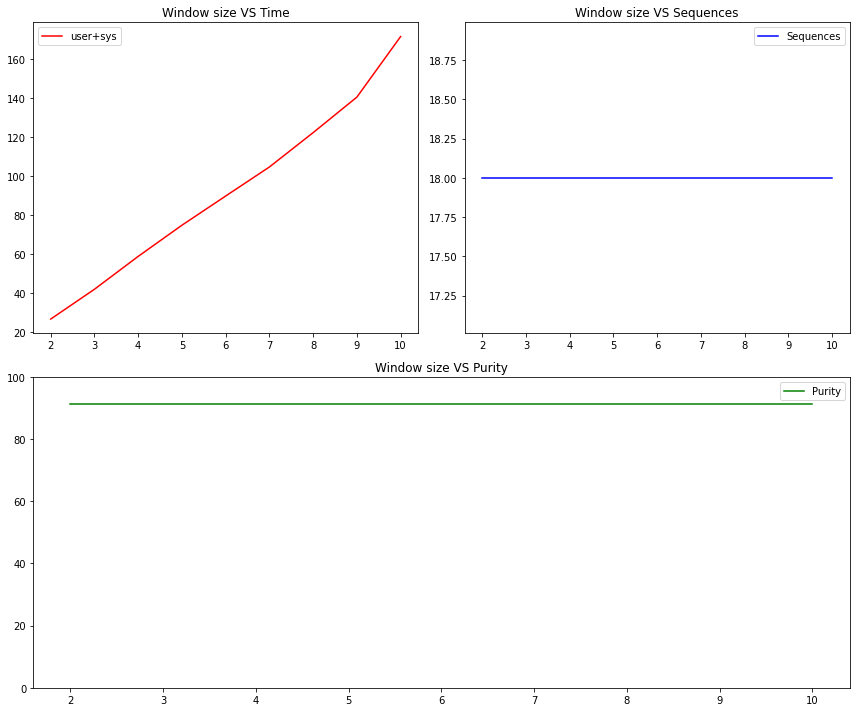

In [38]:
# subplots (All plots on one)

import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs2 = gridspec.GridSpec(2, 2)

# plt.figure()
ax2 = plt.subplots(figsize=(12,10))

ax2 = plt.subplot(gs[0, 0]) # row 0, col 0
ax.set_ylim(0, 200)
plt.title("Window size VS Time")
# plt.plot(x, reals, label="real")
#plt.plot(x, users, label="user")
#plt.plot(x, sys, label="sys")
plt.plot(x, usersAndsys, label="user+sys", color='r')
plt.legend()

ax = pl.subplot(gs[0, 1]) # row 0, col 1
#ax.set_ylim(0, 100)
plt.title("Window size VS Sequences")
plt.plot(x, sequences, label="Sequences", color='b')
plt.legend()
plt.tight_layout()



ax = pl.subplot(gs[1, :]) # row 1, span all columns
ax.set_ylim(0, 100)
plt.title("Window size VS Purity")
plt.plot(x, purity, label="Purity", color='g')
plt.legend()
plt.tight_layout()

plt.show()

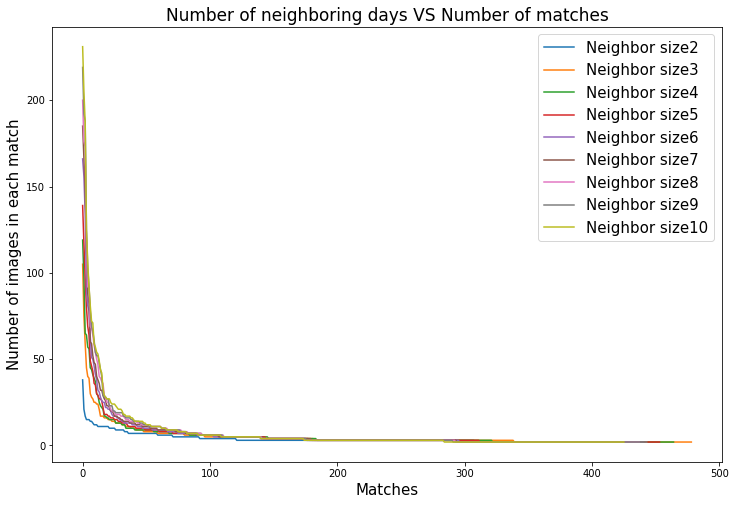

In [166]:
window_sizes = [2 , 3, 4, 5, 6, 7, 8, 9, 10]
donor_id = 'c31'
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams.update({'font.size': 12}, figsize=(10,15))

def check_seq_size(donor_id):
    plt.figure(figsize=(12, 8))
    for window_size in window_sizes:
        df = pd.read_csv("/data/sara/semantic-segmentation-pytorch/data/for_pair_iou_test2/"+\
                         donor_id + 'sequencedpca' + str(window_size),\
                         sep=':', names=['path','cluster_id'])
        clusters = df['cluster_id']
        counts = clusters.value_counts()
        plt.title("Number of neighboring days VS Number of matches", size=17)
        
        plt.plot(np.arange(len(counts)), counts, label="Neighbor size" + str(window_size))
        plt.xlabel("Matches", size=15)
        plt.ylabel("Number of images in each match", size=15)

    plt.legend(prop={'size': 15})
    plt.savefig('wind-seq-size.png')
    plt.show()
check_seq_size(donor_id)

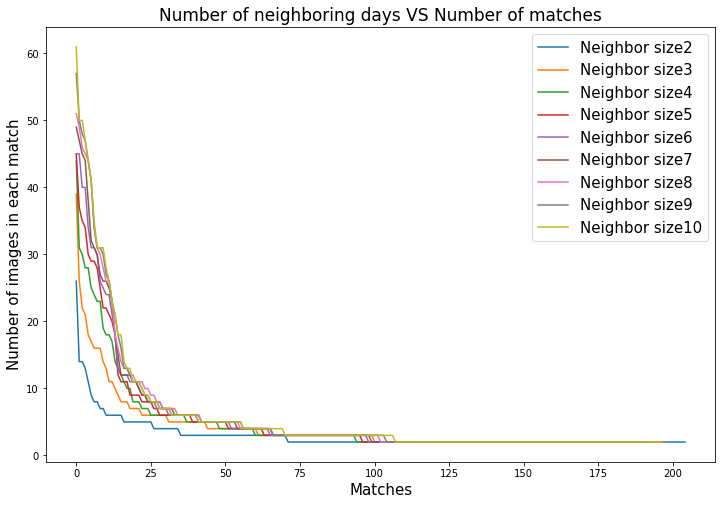

In [167]:
ax = check_seq_size('243')

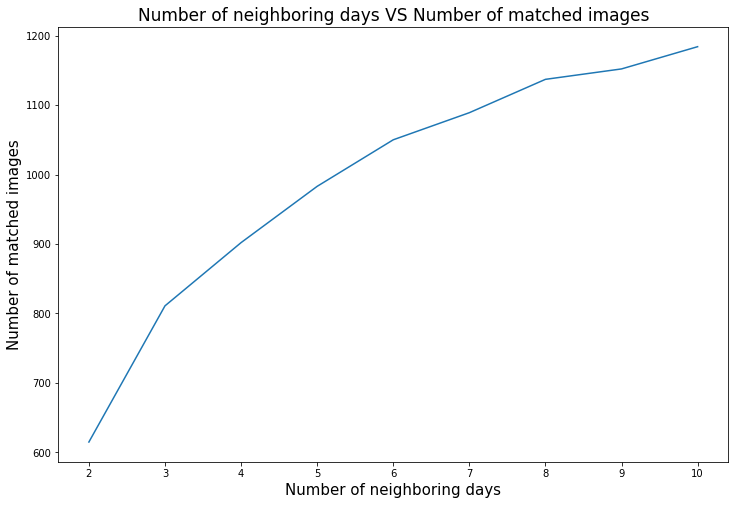

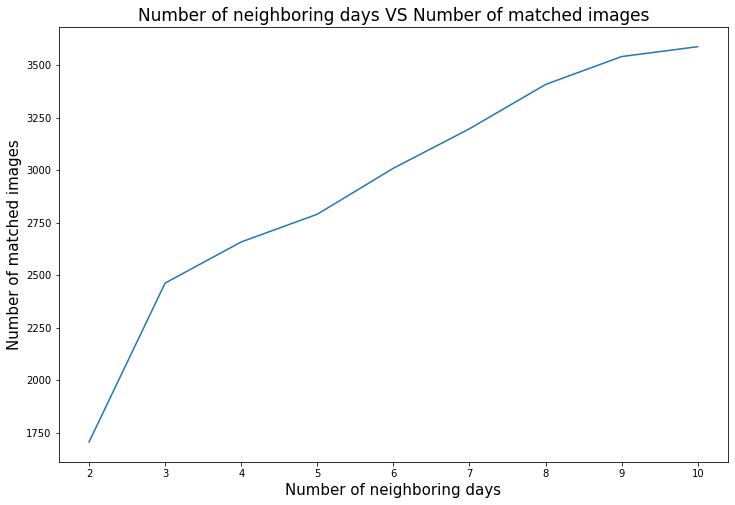

In [168]:
donor_ids = ['243','c31']


for d in donor_ids:
    plt.figure(figsize=(12, 8))
    df = pd.read_csv("/data/sara/semantic-segmentation-pytorch/data/for_pair_iou_test2/"+\
                     'sequence_stat_' + d,\
                     sep=',', names=['num_match','window_size'])
    matches = df['num_match']
    windows = np.arange(2,11)
    plt.title("Number of neighboring days VS Number of matched images", size=17)

    plt.plot(windows, matches, label=d)
    plt.xlabel("Number of neighboring days", size=15)
    plt.ylabel("Number of matched images", size=15)

    #plt.legend(prop={'size': 15})
    plt.savefig('wind-match-size.png')
    plt.show()


In [157]:
df.num_match

0    1705
1    2462
2    2658
3    2790
4    3009
5    3197
6    3408
7    3541
8    3588
Name: num_match, dtype: int64

In [158]:
windows

array([2, 3, 4, 5, 6, 7, 8, 9])